In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
gt = pd.read_csv('sample_submission.csv')

In [6]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [11]:
gt.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [16]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Категорийные признаки

## Определение категорийных признаков

In [40]:
cat_lst = []
def find_categorical(data):
    for name in data.columns:
               
        if (type(data[name][0])) == str:
                
            cat_lst.append(name)
    return(cat_lst)

In [41]:
cat_list = find_categorical(train)
print(f'overal num of cat. features = {len(cat_list)}')

overal num of cat. features = 38


In [42]:
cat_list

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [11]:
train[[x for x in cat_list]]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [12]:
test[[x for x in cat_list]]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [59]:
import warnings
warnings.filterwarnings("ignore")

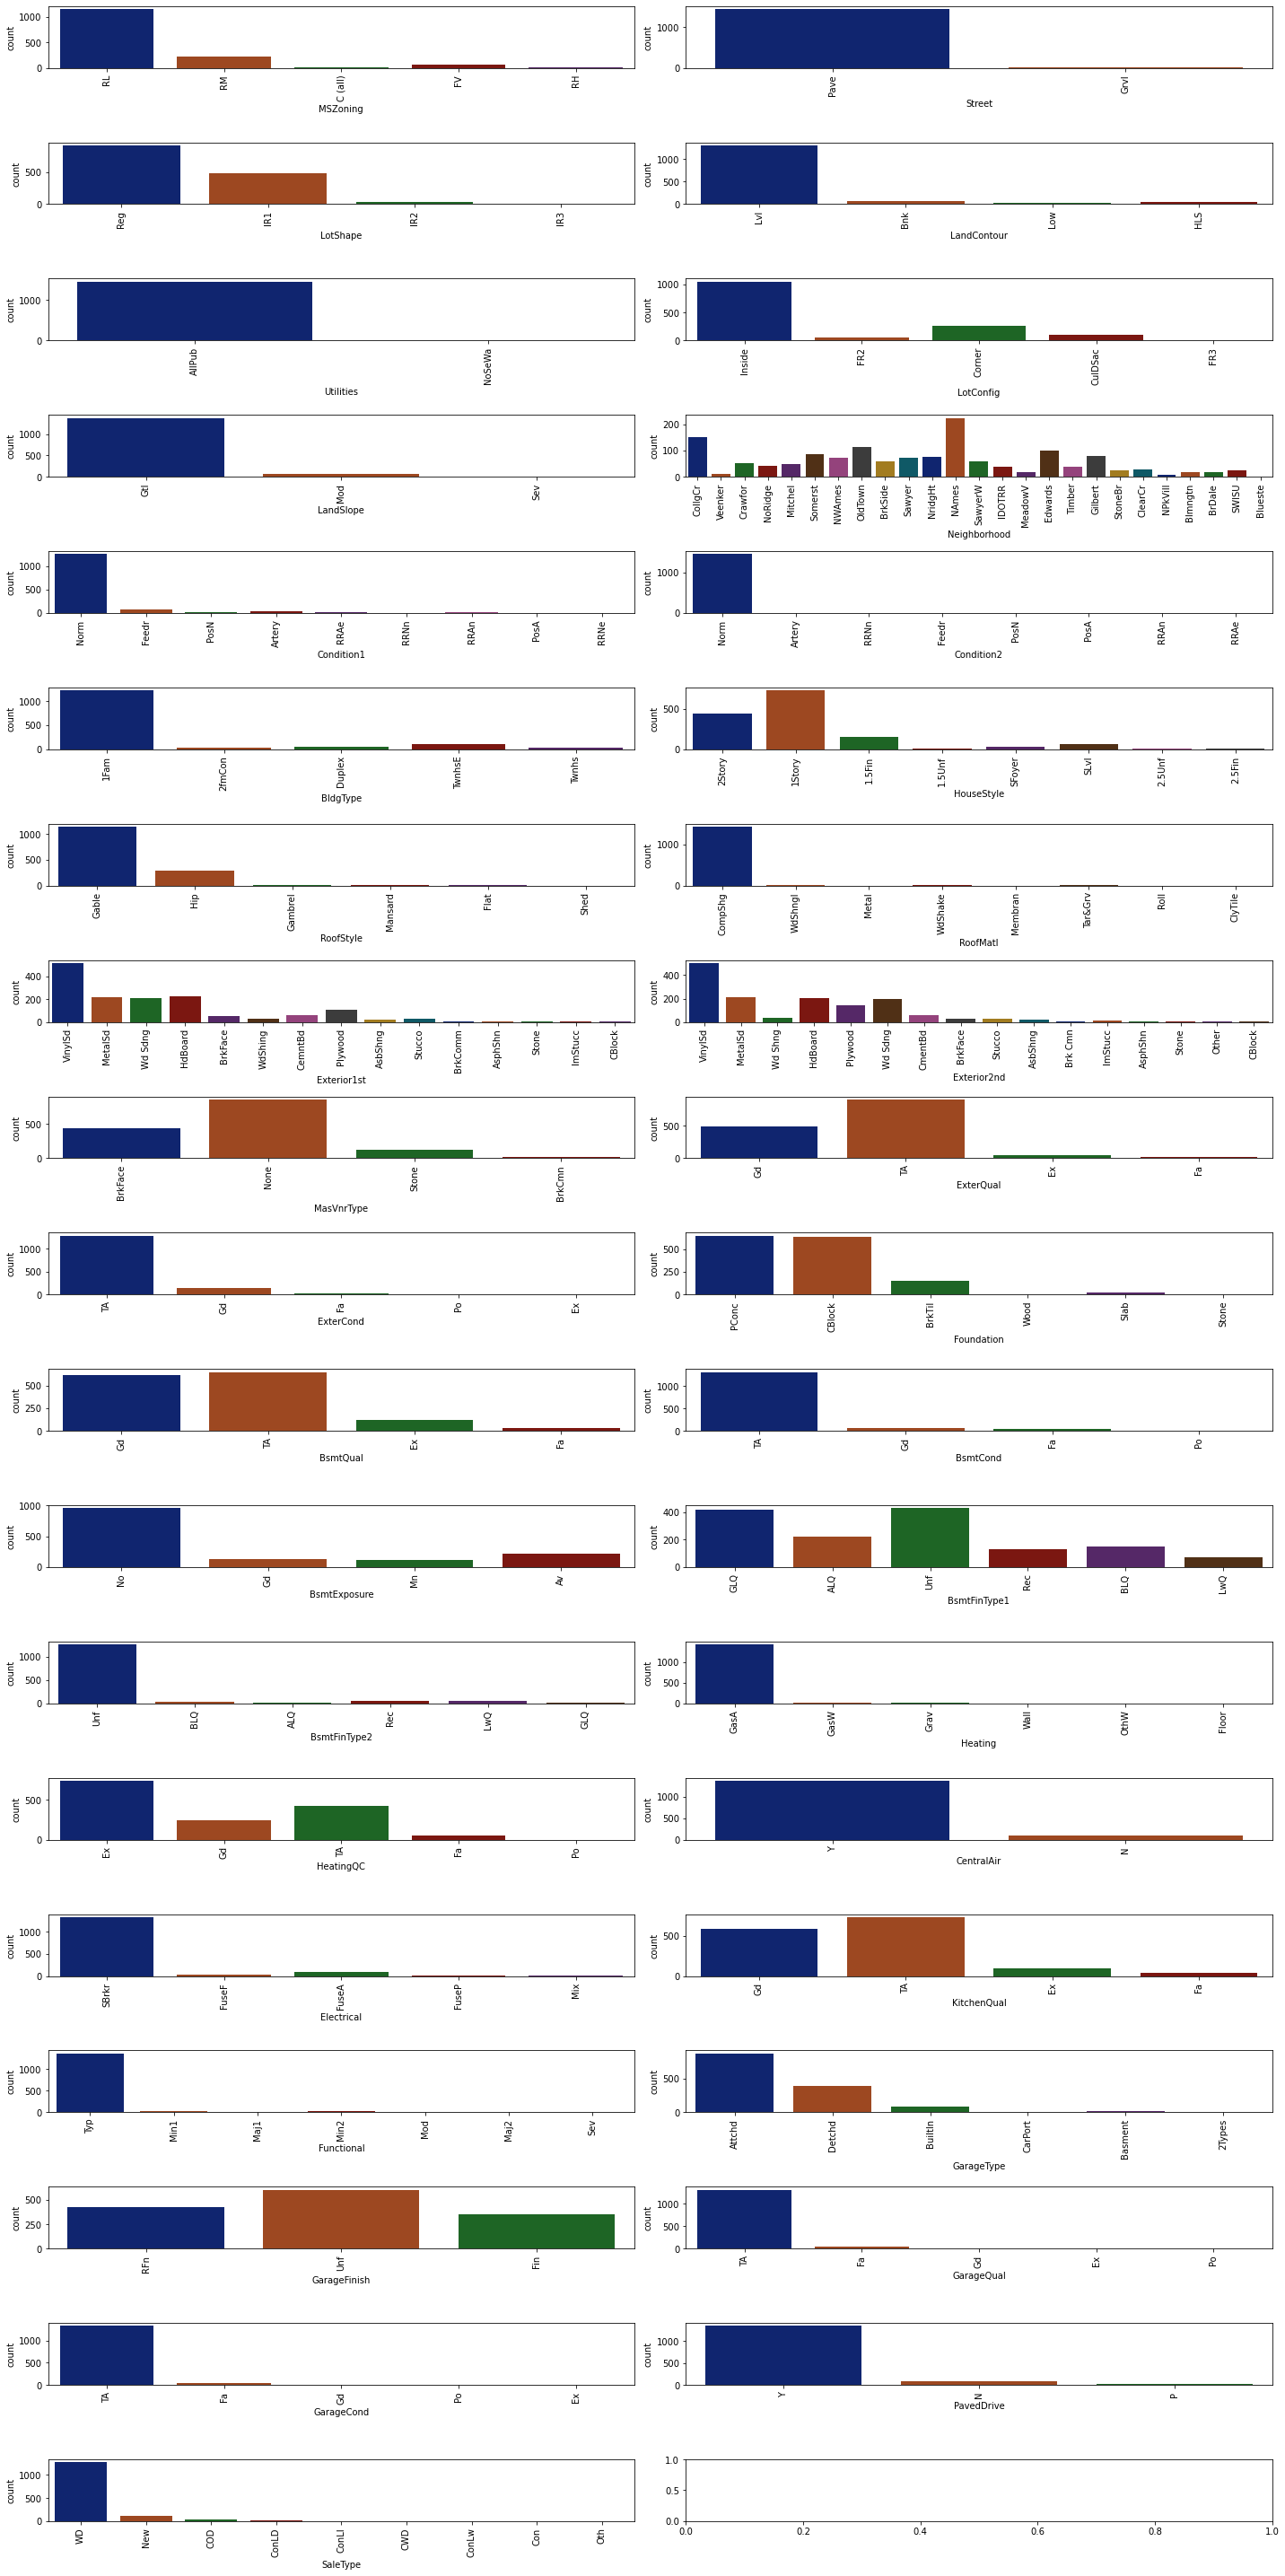

In [61]:
fig, ax = plt.subplots(round(len(train[[x for x in cat_list]].columns) / 2), 2, figsize=(20, 40))

for i, ax in enumerate(fig.axes):
    if i < len(train[[x for x in cat_list]].columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(data=train[[x for x in cat_list]], x=train[[x for x in cat_list]].columns[i], ax=ax, palette='dark')
fig.tight_layout()

###  Категориальные фичи с очень сильным преобладанием одного класса не будут использоваться

###  Street, LandContour, Utilities, LandSlope, Condition2, RoofMat1, BsmtCond, BsmtFinType2, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive будут удалены

In [43]:
features_to_drop = ['Street', 
                    'LandContour', 
                    'Utilities', 
                    'LandSlope', 
                    'Condition2', 
                    'RoofMatl', 
                    'BsmtCond', 
                    'BsmtFinType2', 
                    'Heating', 
                    'CentralAir', 
                    'Electrical',
                    'Functional',
                    'GarageQual',
                    'GarageCond',
                    'PavedDrive'
                   ]

In [44]:
for x in features_to_drop:
    cat_list.remove(x)
    

In [45]:
len(cat_list)

23

In [36]:
cat_list

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [46]:
for i in features_to_drop:
    train.drop([i], axis = 1, inplace = True)

In [14]:
for i in features_to_drop:
    test.drop([i], axis = 1, inplace = True)

In [18]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Inside,CollgCr,Norm,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,FR2,Veenker,Feedr,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Inside,CollgCr,Norm,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,NaN,IR1,Corner,Crawfor,Norm,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,NaN,IR1,FR2,NoRidge,Norm,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,NaN,Reg,Inside,Gilbert,Norm,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,NaN,Reg,Inside,NWAmes,Norm,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,NaN,Reg,Inside,Crawfor,Norm,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,NaN,Reg,Inside,NAmes,Norm,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [19]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,NaN,Reg,Inside,NAmes,Feedr,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,NaN,IR1,Corner,NAmes,Norm,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,NaN,IR1,Inside,Gilbert,Norm,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,NaN,IR1,Inside,Gilbert,Norm,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,NaN,IR1,Inside,StoneBr,Norm,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,NaN,Reg,Inside,MeadowV,Norm,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,NaN,Reg,Inside,MeadowV,Norm,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,NaN,Reg,Inside,Mitchel,Norm,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,NaN,Reg,Inside,Mitchel,Norm,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Просмотр процента незаполненных строк в столбцах оставшихся категориальных признаках

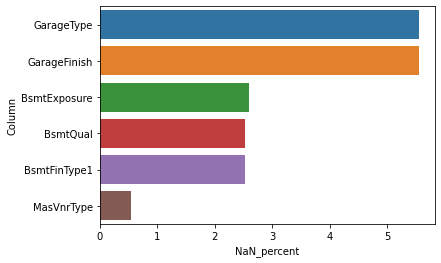

In [15]:
cols_null_train = train[[x for x in cat_list]].columns[train[[x for x in cat_list]].isnull().any()]

nan_counts_train = pd.DataFrame({
    'Column': cols_null_train,
    'NaN_percent': [train[[x for x in cat_list]][col].isnull().sum()*100 / len(train[[x for x in cat_list]]) 
                    for col in cols_null_train]
})

nan_counts_train.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=True)
sns.barplot(data=nan_counts_train, y='Column', x='NaN_percent');

### Заполнение Nan значения самыми частовстречающимися в фиче

In [47]:
for column in train[[x for x in cat_list]].columns:
    train[column].fillna(train[column].mode()[0], inplace = True)
    
    

In [20]:
for column in test[[x for x in cat_list]].columns:
    test[column].fillna(test[column].mode()[0], inplace = True)

In [21]:
train['MSSubClass'].isnull().sum()

0

In [110]:
train_cat_dummies = pd.get_dummies(train_1[[x for x in cat_list]])

In [114]:
train_cat_dummies['Price'] = train['SalePrice']

In [116]:
train_cat_dummies.corr()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Price
MSZoning_C (all),1.000000,-0.017926,-0.008742,-0.160278,-0.034792,-0.040840,-0.014116,-0.006897,0.045922,0.004292,...,-0.025077,-0.003768,-0.065664,0.140993,-0.004353,0.084420,-0.009787,-0.091013,-0.025412,-0.111257
MSZoning_FV,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,-0.081464,0.023612,-0.017926,0.074564,-0.040692,...,0.198831,-0.009795,-0.151069,-0.006499,-0.011314,-0.019651,-0.025439,-0.124064,0.195066,0.089950
MSZoning_RH,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,-0.046176,0.021930,-0.008742,0.039092,-0.015102,...,-0.031785,-0.004776,0.021659,0.100935,-0.005517,-0.009583,-0.012405,-0.036497,-0.032210,-0.065429
MSZoning_RL,-0.160278,-0.416608,-0.203158,1.000000,-0.808585,0.261574,0.027175,0.022698,-0.268764,0.029069,...,0.004972,0.023511,0.015608,-0.063595,0.027158,-0.008548,-0.025492,0.046098,0.002730,0.245063
MSZoning_RM,-0.034792,-0.090435,-0.044101,-0.808585,1.000000,-0.229711,-0.047949,-0.011491,0.242838,-0.006350,...,-0.105674,-0.019011,0.078404,0.014535,-0.021959,0.004432,0.049827,0.050686,-0.100724,-0.288065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,0.084420,-0.019651,-0.009583,-0.008548,0.004432,-0.031877,-0.015474,-0.007560,0.037744,-0.042671,...,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856,-0.015525
SaleCondition_Family,-0.009787,-0.025439,-0.012405,-0.025492,0.049827,-0.032922,-0.020032,0.061658,0.028480,0.036758,...,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062,-0.046480
SaleCondition_Normal,-0.091013,-0.124064,-0.036497,0.046098,0.050686,0.003241,0.014667,-0.026089,-0.003730,-0.022313,...,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323,-0.153990
SaleCondition_Partial,-0.025412,0.195066,-0.032210,0.002730,-0.100724,0.034121,0.007257,0.033950,-0.041636,-0.022404,...,0.986819,-0.013885,-0.769559,-0.083419,-0.016038,-0.027856,-0.036062,-0.654323,1.000000,0.352060


### При one-hot кодировании, таблица слишком разрастается, поэтому будет использован LabelEncoder из sklearn

In [48]:
from sklearn import preprocessing

In [49]:
le = preprocessing.LabelEncoder()

In [50]:
train[[x for x in cat_list]].head(3)

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,...,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn,WD,Normal


In [51]:
for label in cat_list:
    train[label] = le.fit_transform(train[label])

In [26]:
for label in cat_list:
    test[label] = le.fit_transform(test[label])

In [27]:
train[[x for x in cat_list]].head(3)


,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,3,3,4,5,2,0,5,1,12,13,...,2,2,3,2,0,2,1,1,8,4
1,3,3,2,24,1,0,2,1,8,8,...,1,2,1,0,0,3,1,1,8,4
2,3,0,4,5,2,0,5,1,12,13,...,2,2,2,2,0,2,1,1,8,4


In [28]:
test[[x for x in cat_list]].head(3)


,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,2,3,4,12,1,0,2,1,10,12,...,1,3,3,4,4,3,1,2,8,4
1,3,0,0,12,2,0,2,3,11,13,...,1,3,3,0,4,2,1,2,8,4
2,3,0,4,8,2,0,4,1,10,12,...,2,2,3,2,2,3,1,0,8,4


In [32]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,NaN,3,4,5,2,...,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,NaN,3,2,24,1,...,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,NaN,0,4,5,2,...,0,NaN,NaN,NaN,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,NaN,0,0,6,2,...,0,NaN,NaN,NaN,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,NaN,0,2,15,2,...,0,NaN,NaN,NaN,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,NaN,3,4,8,2,...,0,NaN,NaN,NaN,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,NaN,3,4,14,2,...,0,NaN,MnPrv,NaN,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,NaN,3,4,6,2,...,0,NaN,GdPrv,Shed,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,NaN,3,4,12,2,...,0,NaN,NaN,NaN,0,4,2010,8,4,142125


In [33]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,NaN,3,4,12,1,...,120,0,NaN,MnPrv,NaN,0,6,2010,8,4
1,1462,20,3,81.0,14267,NaN,0,0,12,2,...,0,0,NaN,NaN,Gar2,12500,6,2010,8,4
2,1463,60,3,74.0,13830,NaN,0,4,8,2,...,0,0,NaN,MnPrv,NaN,0,3,2010,8,4
3,1464,60,3,78.0,9978,NaN,0,4,8,2,...,0,0,NaN,NaN,NaN,0,6,2010,8,4
4,1465,120,3,43.0,5005,NaN,0,4,22,2,...,144,0,NaN,NaN,NaN,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,NaN,3,4,10,2,...,0,0,NaN,NaN,NaN,0,6,2006,8,4
1455,2916,160,4,21.0,1894,NaN,3,4,10,2,...,0,0,NaN,NaN,NaN,0,4,2006,8,0
1456,2917,20,3,160.0,20000,NaN,3,4,11,2,...,0,0,NaN,NaN,NaN,0,9,2006,8,0
1457,2918,85,3,62.0,10441,NaN,3,4,11,2,...,0,0,NaN,MnPrv,Shed,700,7,2006,8,4


In [52]:
train['MSSubClass'] = le.fit_transform(train['MSSubClass'])

In [30]:
test['MSSubClass'] = le.fit_transform(test['MSSubClass'])

In [157]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,NaN,3,4,5,2,...,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,2,0,3,80.0,9600,NaN,3,2,24,1,...,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,3,5,3,68.0,11250,NaN,0,4,5,2,...,0,NaN,NaN,NaN,0,9,2008,8,4,223500


In [53]:
cat_cor = train[[x for x in cat_list] +['MSSubClass'] + ['SalePrice'] ].corr()['SalePrice']
cat_cor

MSZoning        -0.166872
LotShape        -0.255580
LotConfig       -0.067396
Neighborhood     0.210851
Condition1       0.091155
BldgType        -0.085591
HouseStyle       0.180163
RoofStyle        0.222405
Exterior1st      0.103551
Exterior2nd      0.103766
MasVnrType       0.018216
ExterQual       -0.636884
ExterCond        0.117303
Foundation       0.382479
BsmtQual        -0.618025
BsmtExposure    -0.295407
BsmtFinType1    -0.092106
HeatingQC       -0.400178
KitchenQual     -0.589189
GarageType      -0.302105
GarageFinish    -0.537242
SaleType        -0.054911
SaleCondition    0.213092
MSSubClass      -0.054751
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Хорошая корреляция наблюдается со столбцами: GarageFinish, GarageType, KitchenQual, HeatingQC, BsmtQual, ExterQual, Foundation,  остальные столбцы будут удалены.                                     

In [54]:
cat_cor.index[0]

'MSZoning'

In [55]:
cat_del = []
for i in range(len(cat_cor)):
    if cat_cor[i] > 0:
        if cat_cor[i] < 0.3:
            cat_del.append(cat_cor.index[i])
    else:
        if cat_cor[i] > -0.3:
            cat_del.append(cat_cor.index[i])

In [56]:
cat_del

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'BsmtExposure',
 'BsmtFinType1',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

### Дропаю признаки, у которых корреляция с Sale_price < 0.3(-0.3)

In [57]:
for i in (cat_del):
    train.drop([i], axis = 1, inplace = True)

In [36]:
for i in (cat_del):
     test.drop([i], axis = 1, inplace = True)

In [67]:
train.head()

,LotFrontage,OverallQual,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Yrs_from_build,Yrs_from_rem
0,65.0,7,196.0,2,2,2,706,856,0,856,...,1,2003.0,1,2,548,0,61,208500,5,5
1,80.0,6,0.0,3,1,2,978,1262,0,1262,...,1,1976.0,1,2,460,298,0,181500,31,31
2,68.0,7,162.0,2,2,2,486,920,0,920,...,1,2001.0,1,2,608,0,42,223500,7,6
3,60.0,7,0.0,3,0,3,216,756,2,961,...,5,1998.0,2,3,642,0,35,140000,91,36
4,84.0,8,350.0,2,2,2,655,1145,0,1145,...,1,2000.0,1,3,836,192,84,250000,8,8


In [58]:
train.corr()['SalePrice']

Id              -0.021917
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
ExterQual       -0.636884
Foundation       0.382479
BsmtQual        -0.618025
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
HeatingQC       -0.400178
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
KitchenQual     -0.589189
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageType      -0.302105
GarageYrBlt      0.486362
GarageFinish    -0.537242
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch 

# Числовые признаки

### Немного feature engineering: Год постройки, год продажи и год перестройки будут заменены на: количество лет после постройки, количество лет после перестройки (до покупки) 

In [59]:
train['Yrs_from_build'] = train['YrSold']  - train['YearBuilt']

In [60]:
train['Yrs_from_rem'] = train['YrSold']  - train['YearRemodAdd']

In [61]:
train.drop(['YearBuilt', 'YearRemodAdd'], axis = 1, inplace = True)

In [41]:
train.head(3)

,Id,LotFrontage,LotArea,Alley,OverallQual,OverallCond,MasVnrArea,ExterQual,Foundation,BsmtQual,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,Yrs_from_build,Yrs_from_rem
0,1,65.0,8450,NaN,7,5,196.0,2,2,2,...,0,NaN,NaN,NaN,0,2,2008,208500,5,5
1,2,80.0,9600,NaN,6,8,0.0,3,1,2,...,0,NaN,NaN,NaN,0,5,2007,181500,31,31
2,3,68.0,11250,NaN,7,5,162.0,2,2,2,...,0,NaN,NaN,NaN,0,9,2008,223500,7,6


In [42]:
test['Yrs_from_build'] = test['YrSold']  - test['YearBuilt']

In [43]:
test['Yrs_from_rem'] = test['YrSold']  - test['YearRemodAdd']

In [44]:
test.drop(['YearBuilt', 'YearRemodAdd' ], axis = 1, inplace = True)

### Процент пропущенных значений

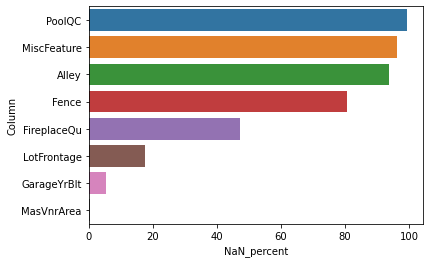

In [62]:
cols_null_train = train.columns[train.isnull().any()]

nan_counts_train = pd.DataFrame({
    'Column': cols_null_train,
    'NaN_percent': [train[col].isnull().sum()*100 / len(train[col]) 
                    for col in cols_null_train]
})

nan_counts_train.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=True)
sns.barplot(data=nan_counts_train, y='Column', x='NaN_percent');

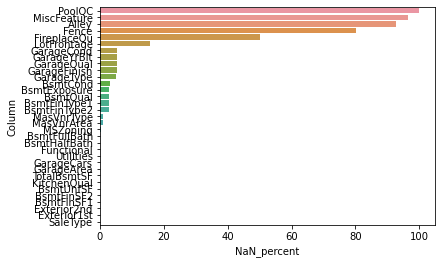

In [7]:
cols_null_test = test.columns[test.isnull().any()]

nan_counts_test = pd.DataFrame({
    'Column': cols_null_test,
    'NaN_percent': [test[col].isnull().sum()*100 / len(test[col]) 
                    for col in cols_null_test]
})

nan_counts_test.sort_values('NaN_percent', ascending=False, inplace=True, ignore_index=True)
sns.barplot(data=nan_counts_test, y='Column', x='NaN_percent');

In [63]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

In [48]:
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

### на фичу LotFrontage посмотрим дальше. Для нее величина корреляции должна быть 0.4, чтобы ее оставить

In [64]:
for column in train.columns:
    train[column].fillna(np.mean(train[column]), inplace = True)

In [71]:
for column in test.columns:
    test[column].fillna(np.mean(test[column]), inplace = True)

In [65]:
cor = train.corr()['SalePrice']


In [66]:
cor

Id               -0.021917
LotFrontage       0.334901
LotArea           0.263843
OverallQual       0.790982
OverallCond      -0.077856
MasVnrArea        0.475241
ExterQual        -0.636884
Foundation        0.382479
BsmtQual         -0.618025
BsmtFinSF1        0.386420
BsmtFinSF2       -0.011378
BsmtUnfSF         0.214479
TotalBsmtSF       0.613581
HeatingQC        -0.400178
1stFlrSF          0.605852
2ndFlrSF          0.319334
LowQualFinSF     -0.025606
GrLivArea         0.708624
BsmtFullBath      0.227122
BsmtHalfBath     -0.016844
FullBath          0.560664
HalfBath          0.284108
BedroomAbvGr      0.168213
KitchenAbvGr     -0.135907
KitchenQual      -0.589189
TotRmsAbvGrd      0.533723
Fireplaces        0.466929
GarageType       -0.302105
GarageYrBlt       0.470177
GarageFinish     -0.537242
GarageCars        0.640409
GarageArea        0.623431
WoodDeckSF        0.324413
OpenPorchSF       0.315856
EnclosedPorch    -0.128578
3SsnPorch         0.044584
ScreenPorch       0.111447
P

In [67]:
ncat_del = []
for i in range(len(cor)):
    if cor[i] > 0:
        if cor[i] < 0.3:
            ncat_del.append(cor.index[i])
    else:
        if cor[i] > -0.3:
            ncat_del.append(cor.index[i])

In [68]:
ncat_del

['Id',
 'LotArea',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [69]:
for i in (ncat_del):
    train.drop([i], axis = 1, inplace = True)

In [55]:
for i in (ncat_del):
    test.drop([i], axis = 1, inplace = True)

In [56]:
train

,LotFrontage,OverallQual,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Yrs_from_build,Yrs_from_rem
0,65.0,7,196.0,2,2,2,706,856,0,856,...,1,2003.0,1,2,548,0,61,208500,5,5
1,80.0,6,0.0,3,1,2,978,1262,0,1262,...,1,1976.0,1,2,460,298,0,181500,31,31
2,68.0,7,162.0,2,2,2,486,920,0,920,...,1,2001.0,1,2,608,0,42,223500,7,6
3,60.0,7,0.0,3,0,3,216,756,2,961,...,5,1998.0,2,3,642,0,35,140000,91,36
4,84.0,8,350.0,2,2,2,655,1145,0,1145,...,1,2000.0,1,3,836,192,84,250000,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,0.0,3,2,2,0,953,0,953,...,1,1999.0,1,2,460,0,40,175000,8,7
1456,85.0,6,119.0,3,1,2,790,1542,4,2073,...,1,1978.0,2,2,500,349,0,210000,32,22
1457,66.0,7,0.0,0,4,3,275,1152,0,1188,...,1,1941.0,1,1,252,0,60,266500,69,4
1458,68.0,5,0.0,3,1,3,49,1078,2,1078,...,1,1950.0,2,1,240,366,0,142125,60,14


In [70]:
y_train = train['SalePrice']

In [71]:
X_train = train.drop(['SalePrice'], axis = 1)

In [59]:
gt

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [60]:
y_test = gt ['SalePrice']

In [61]:
X_test = test

In [62]:
X_train.shape, y_train.shape

((1460, 25), (1460,))

In [63]:
X_test.shape, y_test.shape

((1459, 25), (1459,))

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()



In [75]:
model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_test)

In [79]:
from sklearn import metrics

In [80]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

69888.27345876009

In [81]:
np.round(metrics.r2_score(y_test, y_pred), 2)

-16.91

In [329]:
X_test.shape, X_train.shape

((1459, 25), (1460, 25))

In [330]:
y_test.shape, y_train.shape

((1459,), (1460,))

In [88]:
model = LinearRegression()

In [94]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test_scaled)

In [96]:
from sklearn import metrics

In [97]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

69040.13840154505

In [98]:
np.round(metrics.r2_score(y_test, y_pred), 2)

-16.48

In [8]:
from sklearn.model_selection import train_test_split

In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [78]:
model3 = LinearRegression()

In [83]:
model3.fit(X_train1, y_train1)

LinearRegression()

In [84]:
y_pred = model3.predict(X_test1)

In [86]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test1, y_pred))

33639.760706795656

In [89]:
np.round(metrics.r2_score(y_test1, y_pred), 2)

0.84